<a href="https://colab.research.google.com/github/EzyHow/ML-Deep-Learning-GenAI/blob/main/Generate_10_variations_of_the_image_from_male_to_female_as_per_gender_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier


# Task

- Load the pretrained Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

1.1 Load the Pretrained Generator

In [2]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN.git

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_700.h5', compile=False)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

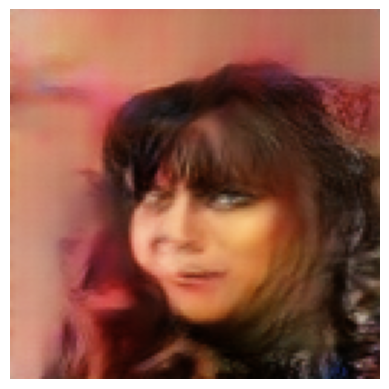

In [4]:

noise = tf.random.normal([1, 100])
# noise += .5

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

1.2 Load Gender Vector

In [5]:
!git clone https://github.com/AshishJangra27/Gender-Style-Transfer.git

Cloning into 'Gender-Style-Transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 18.87 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [6]:
gender_vec = np.load('/content/Gender-Style-Transfer/gender_vec.npy')

1.3 Generate 10 Variations of the image from male to female as per gender vector

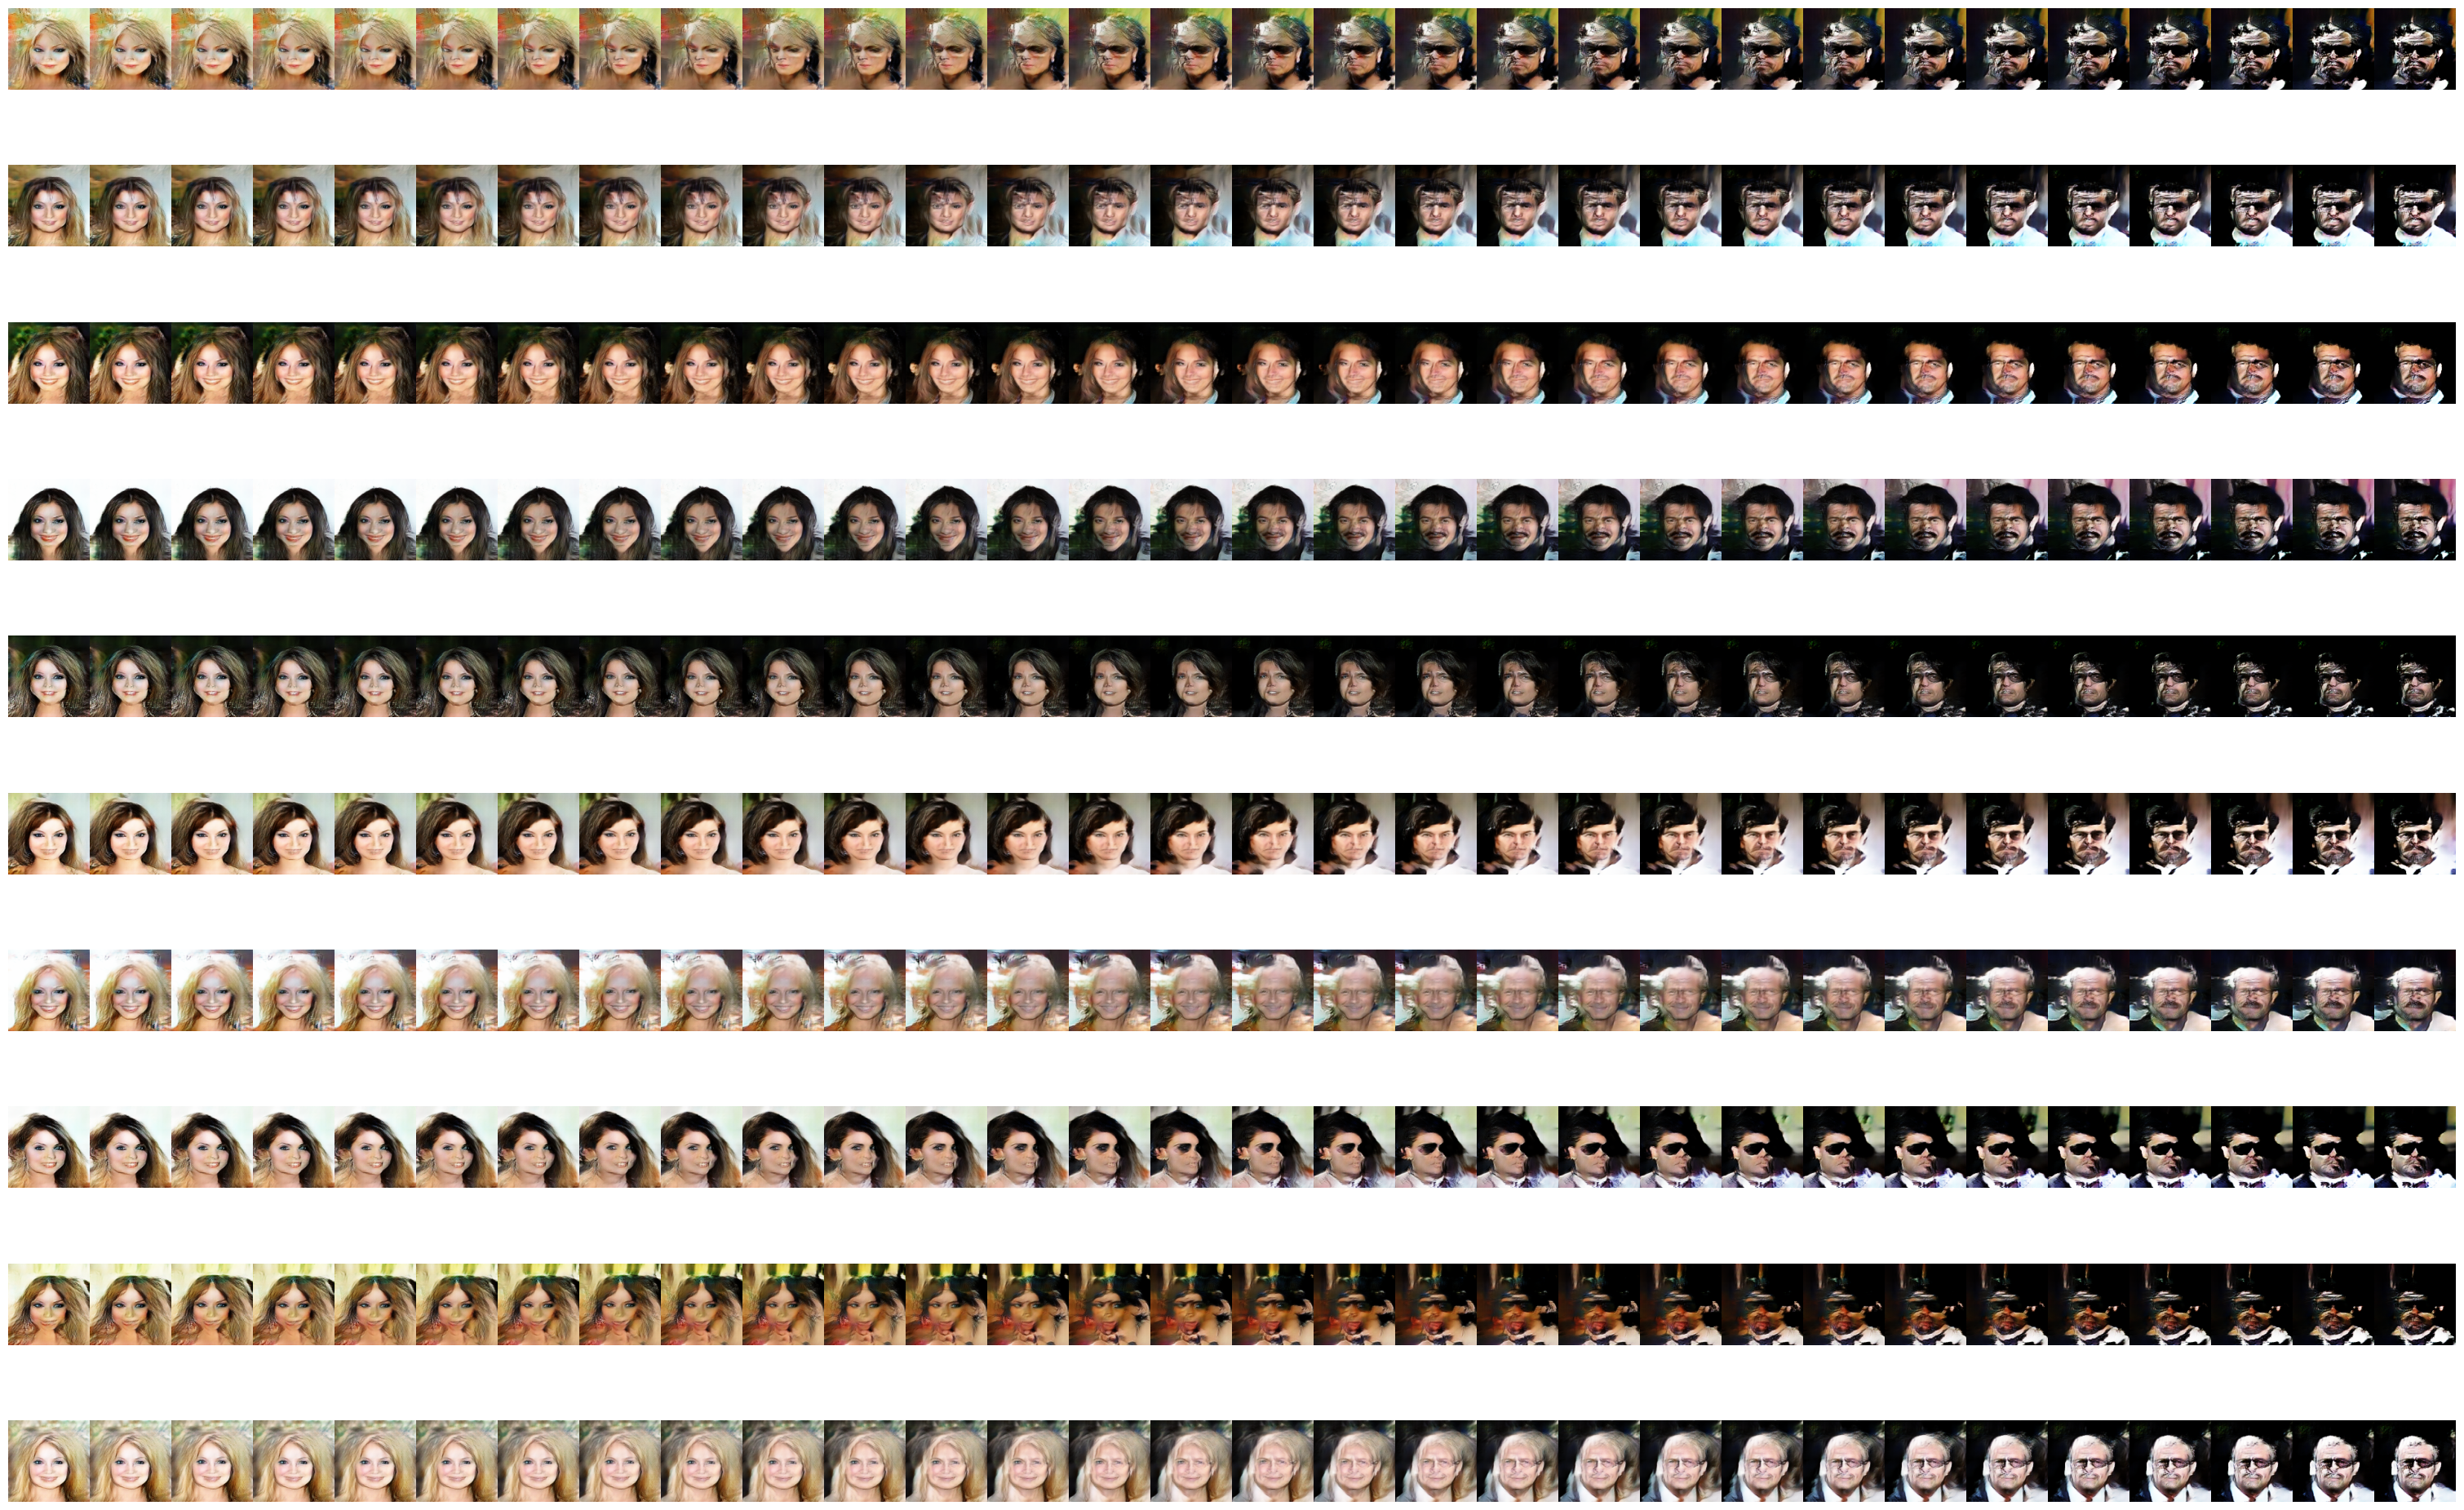

In [8]:
def generate(noise):
    return (generator(noise, training=False) + 1) / 2.0  # Rescale from [-1,1] to [0,1]

noises = tf.random.normal([10, 100])

modifications = np.linspace(-3, 3, 30)  # 30 steps from -3 to 3

fig, axes = plt.subplots(10, 30, figsize=(30, 20))

for row, noise in enumerate(noises):
    for col, mod in enumerate(modifications):
        axes[row, col].imshow(generate(noise + mod * gender_vec)[0])
        axes[row, col].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)  # Remove spaces
plt.tight_layout(pad=0)
plt.show()